# CROSS-SPECTRAL ANALYSIS AND FILTERING
<div class="alert alert-block alert-success" style="font-size:16px">In this exercise, we will examine the relationship between two time series and whether or not they share any periodicities in two ways: (1) Cross-spectral analysis and (2) lag-correlation and filtering. Feel free to use any of your old code to compute power spectra - this is a good chance to test if your functions work well.</div>

<div style="font-size:16px"><b>Make sure to follow the directions written in the document. <font color=green>Green</font> boxes contain important information and have <u>completed</u> code after them. <font color=gold>Yellow</font> boxes contain options that you need to select or make to continue on with the problem. <font color=blue>Blue</font> boxes contain instructions, and the cells after them are for YOU to complete in-class.</b></div>

In [1]:
#-------------------------------------------------------------------------
# Libraries to import.
#-------------------------------------------------------------------------
import os,sys,warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import signal,stats
from matplotlib.ticker import MultipleLocator
from datetime import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter


# LOAD THE TIME SERIES

<div class="alert alert-block alert-success" style="font-size:16px">Load in the two time series that will be used in this exercise. Call them $x$ and $y$. For this exercise, assume $\Delta t = 1$ month.</div>

In [2]:
x = np.loadtxt('HW#5TimeSeries2.txt')
y = np.loadtxt('HW#5TimeSeries3.txt')

# CALCULATE THE POWER SPECTRA OF X AND Y.

<div class="alert alert-block alert-success" style="font-size:16px">Use the following constants and parameters for the power spectra analysis.</div>

In [3]:
SUBDIVIDE = 10 # Chop up the time series into X pieces.
SEGMENTS = 10 # Since we won't be using windows, we don't need overlapping segments.

num = y.size/SUBDIVIDE # The length of the time series over which to conduct power spectrum analysis
N = int(np.floor(num/2.)*2) # Get an even number of points for the power spectrum analysis.

nyquist = int(N/2)

dt = 1. # Timestep is 1 month.
T = dt*N 

i = np.arange(1,N+1) # Discrete counter for the points in y.


<div class="alert alert-block alert-success" style="font-size:16px">Declare the $A$ and $B$ arrays - the two coefficients as a function of wavenumber. Do one for $x$ and one for $y$.</div>

In [4]:
Ax = np.ones((nyquist+1,SEGMENTS))*np.nan 
Bx = np.ones((nyquist+1,SEGMENTS))*np.nan 

Ay = np.ones((nyquist+1,SEGMENTS))*np.nan 
By = np.ones((nyquist+1,SEGMENTS))*np.nan 

<div class="alert alert-block alert-info" style="font-size:16px">Loop over subdivisions starting at 0. Then, calculate A_k and B_k for EACH time series ($x$ and $y$). Do NOT use a window for these spectra and do not do overlapping segments. </div>

In [5]:
y.shape

(10000,)

In [6]:
#-------------------------------------------------------------------------
# Calculations for time series #1 (x).
#-------------------------------------------------------------------------
start = 0
for m in range(SEGMENTS):
    xsub = x[start:start+N] # define the segment of x from start to start + N
    xsub = signal.detrend(xsub) # Detrend xsub
    xsub = (xsub - xsub.mean())/xsub.std() # Standardize xsub
    
    for k in range(1,nyquist):
        Ax[k,m] = 2./N*(xsub*np.cos(2*np.pi*k*i*dt/T)).sum()
        Bx[k,m] = 2./N*(xsub*np.sin(2*np.pi*k*i*dt/T)).sum()
    
    k = nyquist
    Ax[k,m] = 1/N*(xsub*np.cos(np.pi*N*i*dt/T)).sum()
    Bx[k,m] = 0.
    
    start+=N #Move to the next segment.
    

#-------------------------------------------------------------------------
# Calculations for time series #2 (y).
#-------------------------------------------------------------------------
start = 0
for m in range(SEGMENTS):
    ysub = y[start:start+N] # define the segment of y from start to start + N
    ysub = signal.detrend(ysub) # Detrend ysub
    ysub = (ysub - ysub.mean())/ysub.std() # Standardize ysub
    
    for k in range(1,nyquist):
        Ay[k,m] = 2./N*(ysub*np.cos(2*np.pi*k*i*dt/T)).sum()
        By[k,m] = 2./N*(ysub*np.sin(2*np.pi*k*i*dt/T)).sum()
    
    k = nyquist
    Ay[k,m] = 1/N*(ysub*np.cos(np.pi*N*i*dt/T)).sum()
    By[k,m] = 0.
    
    start+=N #Move to the next segment.


<div class="alert alert-block alert-info" style="font-size:16px">Calculate the AVERAGE power spectrum of $x$ $\left(F_{xx}\right)$ and $y$ $\left(F_{yy}\right)$. That is, average over all segments.</div>

In [7]:
Fxx = np.nanmean(Ax**2, axis=1) + np.nanmean(Bx**2, axis=1)
Fyy = np.nanmean(Ay**2, axis=1) + np.nanmean(By**2, axis=1)

Fxx = Fxx[1:]
Fyy = Fyy[1:]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


<div class="alert alert-block alert-info" style="font-size:16px">Calculate the cross-spectrum $\left(F_{xy}\right)$, the co-spectrum $\left(Co\right)$, and the quadrature spectrum $\left(Q\right)$. Use numpy.real and numpy.imag for the two components. $j$ is notation for imaginary number in Python. Remember, you will average each component of $\left(F_{xy}\right)$ over all segments separately to get meanCo and meanQ.</div>

In [8]:
Fxy = np.real(Ax*Ay + Bx*By) + np.imag(Ax*By+Bx*Ay)
Fxy = Fxy[1:]

meanCo = np.nanmean(Ax*Ay + Bx*By, axis=1)[1:]
meanQ = np.nanmean(Ax*By+Bx*Ay, axis=1)[1:]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


<div class="alert alert-block alert-info" style="font-size:16px">Calculate coherence squared $\left(coh^2\right)$.</div>

In [9]:
coh2 = (meanCo**2+meanQ**2)/(Fxx*Fyy)

<div class="alert alert-block alert-success" style="font-size:16px">For significance of the $coh^2$ curve, we will use a table provided by Hartmann. There is also a formula from the book <i>Time series analysis and its applications</i> by Shumway and Stoffer: $Coh^2_{sig} = F^{-1}(p,2,\nu-2) / \left[ \nu/2 - 1 + F^{-1}(p,2,\nu-2) \right]$, where $\nu$ is the degrees of freedom, $p$ is the $p$-level of interest, and $F^{-1}$ is the inverse of the $F$-distribution.</div>

In [10]:
sigCoh2 = .146 # 95% level from Hartmann's notes 
               # for 20 degrees of freedom (10 subdivisions x 2 d.o.f each)

<div class="alert alert-block alert-success" style="font-size:16px">Scale the spectra such that the total area under each of the power spectra is 1.</div>

In [11]:
k = np.arange(1,nyquist+1) # Wavenumbers
omega = 2*np.pi*k/float(T) # Angular frequency

delta = omega[1]-omega[0]
scaledPowerX = Fxx/np.nansum(delta*Fxx)
scaledPowerY = Fyy/np.nansum(delta*Fyy)

# PLOT THE POWER SPECTRA AND THE COHERENCE SQUARED.

<div class="alert alert-block alert-info" style="font-size:16px"> Make a figure with three (3) plots: (a) The power spectrum of Time Series #1; (b) The power spectrum of Time Series #2; and (c) the squared coherence (with significance level). Make sure to put proper labels on the axes and proper titles for each subplot of the figure. </div>

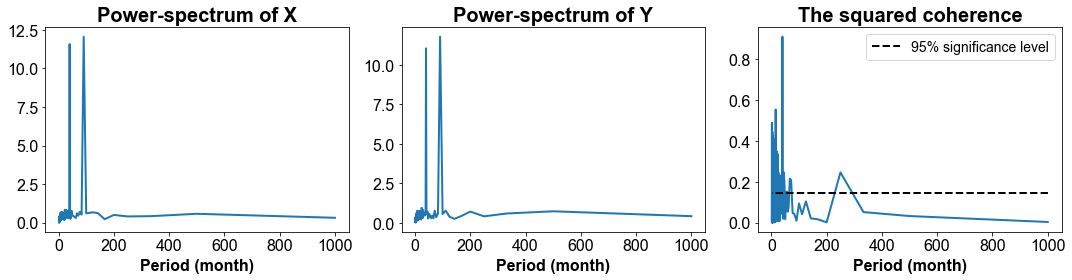

In [12]:
period = 2*np.pi/omega # In months - use for your x-axis in your plot.

fig= plt.figure(figsize=(15,4))
ax= fig.add_subplot(131)
ax.plot(period, scaledPowerX)
ax.set_title('Power-spectrum of X', weight='bold')
ax.set_xlabel('Period (month)')
ax= fig.add_subplot(132)
ax.plot(period, scaledPowerY)
ax.set_title('Power-spectrum of Y', weight='bold')
ax.set_xlabel('Period (month)')
ax= fig.add_subplot(133)
ax.set_title('The squared coherence', weight='bold')
ax.plot(period, coh2)
ax.set_xlabel('Period (month)')
ax.plot(period, [0.146]*len(omega), 'k--', label='95% significance level')
ax.legend();

Fig.1 Cross-power spectrum of time series 1 (leftmost) and 2 (middle) with respect to period. The rightmost is the sqared coherence with period.

# FIND THE DOMINANT PERIODS IN EACH SERIES.

<div class="alert alert-block alert-info" style="font-size:16px">Next, find at what periods the peaks exist (i.e., where $coh^2$ is also a local max). You can use numpy.argsort, which returns the indices that sort an array. YOU SHOULD FIND AT LEAST TWO (2) PEAKS.</div>

In [13]:
maxCohIndex = np.argsort(coh2)[::-1]
maxPeriod = period[maxCohIndex][:2]

print(maxPeriod)

[40.    15.625]


# FIND THE PHASE OF THE SIGNIFICANT PERIOD.

<div class="alert alert-block alert-info" style="font-size:16px">Find the phase angle for the relationship for the two dominant peaks. Use np.arctan2 and state your answer in degrees.</div>

In [14]:
phaseAngle = np.arctan2(meanQ[maxCohIndex][0], meanCo[maxCohIndex][0]) / 2 / np.pi * 360

print('Phase angle for the first dominant peak:', phaseAngle.round(1), 'degrees')

phaseAngle = np.arctan2(meanQ[maxCohIndex][1], meanCo[maxCohIndex][1]) / 2 / np.pi * 360

print('Phase angle for the second dominant peak:', phaseAngle.round(1), 'degrees')

Phase angle for the first dominant peak: 46.7 degrees
Phase angle for the second dominant peak: -37.2 degrees


# LOW-PASS FILTERING
<div class="alert alert-block alert-info" style="font-size:16px">Understanding the phase angle could be difficult by itself. But, we can convert it to a more "physical" unit through lag correlation. For this exercise, choose the LOWEST frequency (i.e., longest period) common to both time series. Make a Butterworth filter with $N=7$ weights to isolate those frequencies in the time series. Use signal.butter to get the weights (a's and b's). The default is a low-pass filter (i.e., keyword btype='lowpass').</div>

In [15]:
N = 7 # Filter order
Wn = 2./maxPeriod[0] #Threshold frequency (in Nyquist units of 1/(2*dt)) For example, for a 12-month low-pass filter, you would use
       #Wn = 2./12.

b,a = signal.butter(N, Wn)

<div class="alert alert-block alert-info" style="font-size:16px">Apply the weights to BOTH x and y to make filtered time series. Use signal.filtfilt to apply the weights.  </div>

In [16]:
xLowPass = signal.filtfilt(b,a,x)
yLowPass = signal.filtfilt(b,a,y)

# LAG CORRELATION

<div class="alert alert-block alert-info" style="font-size:16px">Now compute the lag-correlation of the FILTERED time series (xLowPass and yLowPass) to find at what lag (positive or negative) the relationship is the strongest for this lowest frequency variability.</div>

In [17]:
lags = np.arange(-300,301) # Make a range of lags.
lagCorr = np.ones((lags.size,))*np.nan

for n,ilag in enumerate(lags):    
    if ilag<0: lagCorr[n] = stats.pearsonr(xLowPass[:ilag], yLowPass[abs(ilag):])[0]
    else: lagCorr[n] = stats.pearsonr(xLowPass[ilag:], yLowPass[:len(yLowPass)-ilag])[0]

# PLOT THE LAG CORRELATION
<div class="alert alert-block alert-info" style="font-size:16px">Make a plot of the lag correlation (lagCorr vs. lags). Identify the lag/lags which would make sense for the relationship, and try to relate it to the phase angle you found earlier. </div>

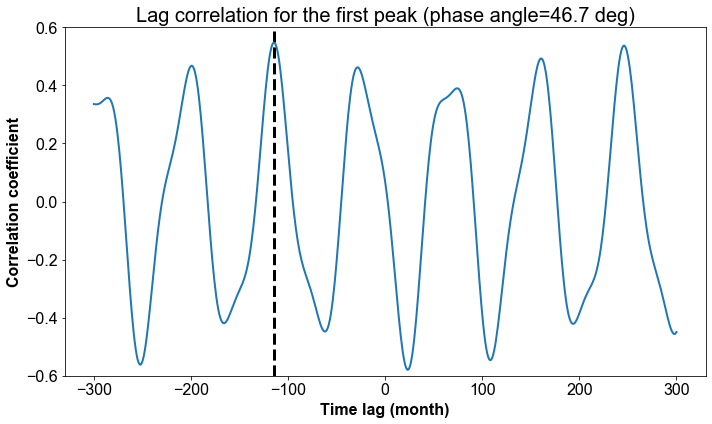

In [18]:
plt.figure(figsize=(10,6))
plt.plot(lags, lagCorr)
plt.xlabel('Time lag (month)')
plt.ylabel('Correlation coefficient')
plt.vlines(lags[np.argmax(lagCorr)], -.6, .6, linestyle='dashed', linewidth=3)
plt.ylim([-.6,.6])
plt.title('Lag correlation for the first peak (phase angle=46.7 deg)');

Fig.2 The lag correlation between low-filtered time series 1 and time series 2 at phase angle 46.7. The vertical line represents the strongest correlation.

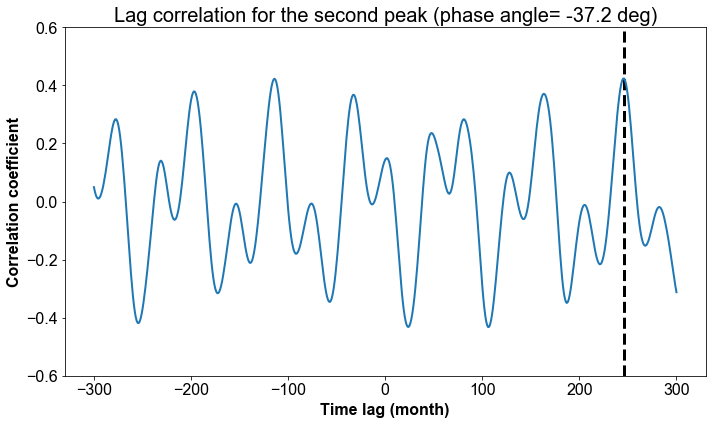

In [19]:
N = 7 # Filter order
Wn = 2./maxPeriod[1] #Threshold frequency (in Nyquist units of 1/(2*dt)) For example, for a 12-month low-pass filter, you would use
       #Wn = 2./12.

b,a = signal.butter(N, Wn)
xLowPass = signal.filtfilt(b,a,x)
yLowPass = signal.filtfilt(b,a,y)

lags = np.arange(-300,301) # Make a range of lags.
lagCorr = np.ones((lags.size,))*np.nan

for n,ilag in enumerate(lags):    
    if ilag<0: lagCorr[n] = stats.pearsonr(xLowPass[:ilag], yLowPass[abs(ilag):])[0]
    else: lagCorr[n] = stats.pearsonr(xLowPass[ilag:], yLowPass[:len(yLowPass)-ilag])[0]
        
plt.figure(figsize=(10,6))
plt.plot(lags, lagCorr)
plt.vlines(lags[np.argmax(lagCorr)], -.6, .6, linestyle='dashed', linewidth=3)
plt.ylim([-.6,.6])
plt.xlabel('Time lag (month)')
plt.ylabel('Correlation coefficient')
plt.title('Lag correlation for the second peak (phase angle= -37.2 deg)');

Fig.3 The lag correlation between low-filtered time series 1 and time series 2 at phase angle -37.2. The vertical line represents the strongest correlation.